# Stack Overflow Survey Analysis

Stack Overflow is the top question and answer site for professional and enthusiast programmers. It's like Wikepedia for computer programmers. It has been conducting an annual developer survey since last 9 years.The survey covers everything from developers’ favorite technologies to their education and job preferences.

This analysis is based on Stack Overflow's 2019 annual developer survey that was taken by 90,000 developers around the world. We'll be using CRISP-DM (Cross Industry Process for Data Mining) approach to find data-driven solutions to problems faced by individuals and businesses. Let's first think about questions that we want answers for.

# Questions
A lot of aspiring software developers/engineers are curious to know what they should be doing in order to break into the field. There is a plethora of information available out there but that makes it a lot more confusing also. Do you think there is a better way to get answers to our questions? 

Fortunately, there is! Get answers to your questions directly from the software engineers who are working in the industry. We'll analyze the survey filled out by software engineers to get answers to the following questions -

1) Should I pursue higher education? Which degree – BS, MS..? <br>
2) What should I concentrate in? Subjects? <br>
3) What languages, databases and platforms should I learn? <br>
4) How does the job and career satisfaction look like? <br>
5) How much will I get paid and which countries pay well to software engineers? <br>
6) On what factors does salary depend? <br>
7) On what factors does job/career satisfaction depend? <br>

# Exploratory Data Analysis
Let's start exploring the data in order to find answers to our questions.

In [160]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [5]:
# Importing the survey dataset - Downloaded dataset from https://insights.stackoverflow.com/survey
df_survey = pd.read_csv('./survey_results_public.csv')
df_survey.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [6]:
# Number of rows and columns in the dataset
print("Stack Overflow 2019 dataset contains {} rows and {} columns".format(df_survey.shape[0], df_survey.shape[1]))

Stack Overflow 2019 dataset contains 88883 rows and 85 columns


In [7]:
# Understanding the columns/features available
df_survey.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

In [8]:
# Understanding numerical data
df_survey.describe()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
count,88883.000000,5.594500e+04,5.582300e+04,64503.000000,49790.000000,79210.000000
mean,44442.000000,5.519014e+11,1.271107e+05,42.127197,5.084308,30.336699
std,25658.456325,7.331926e+13,2.841523e+05,37.287610,5.513931,9.178390
min,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,1.000000
25%,22221.500000,2.000000e+04,2.577750e+04,40.000000,2.000000,24.000000
50%,44442.000000,6.200000e+04,5.728700e+04,40.000000,4.000000,29.000000
75%,66662.500000,1.200000e+05,1.000000e+05,44.750000,6.000000,35.000000
max,88883.000000,1.000000e+16,2.000000e+06,4850.000000,99.000000,99.000000


CompTotal is the total compensation of the respondent in their home currency and it is paid weekly, monthly or annualy. ConvertedComp is the total annual salary in USD, which is converted by using the exchange rate. We'll take ConvertedComp for our further analysis, however we might need to change it to a better compensation metric that would include cost of living, which is not taken into account while converting to USD.

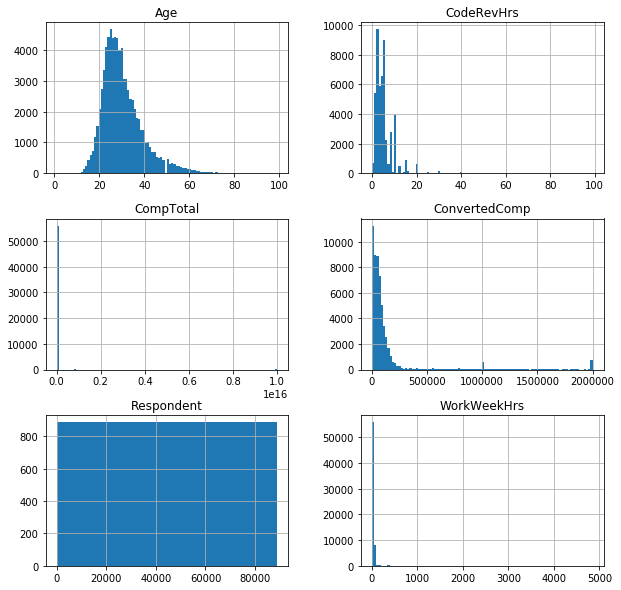

In [9]:
#Checking distribution of the continuous variables
df_survey.hist(bins=100, figsize=(10,10));

We can see from the summary statistics and graph distributions that there are many outliers in the dataset. E.g. some respondents have age 1 and 99, which is highly unlikely. So, we need to remove these outliers. Let's use Interquartile range (IQR) approach to do so and then if there are still any outliers, we'll deal with it.

In [10]:
# Removing outliers and saving the results to a new dataframe
df_survey_no_outlier = df_survey.copy()
for col in ['Age', 'CodeRevHrs', 'ConvertedComp']:
    q1  = df_survey_no_outlier[col].quantile(0.25)
    q3  = df_survey_no_outlier[col].quantile(0.75)
    iqr = q3-q1
    df_survey_no_outlier = df_survey_no_outlier[~((df_survey_no_outlier[col] > (q3+1.5*iqr)) | (df_survey_no_outlier[col] < (q1-1.5*iqr)))]

print("Percentage of outliers removed: {}".format(((len(df_survey) - len(df_survey_no_outlier))/len(df_survey))*100))



Percentage of outliers removed: 10.435066323143909


Now let's check the distribution for each continuous variable in more detail after removing the outliers.

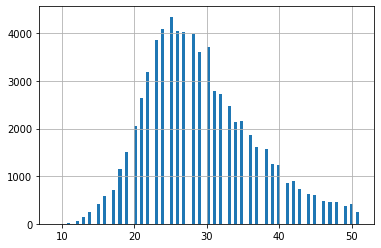

In [11]:
# Analyzing Age
df_survey_no_outlier['Age'].hist(bins=100);

After removing the outliers, we can see a normal distribution for Age. It will be intereseting to see how many people are less than 18 years of age as it tells us how many young kids are excited about coding.

In [12]:
print("Respondents who are less than 18 years old: {}".format(len(df_survey_no_outlier[df_survey_no_outlier['Age'] < 18])))

Respondents who are less than 18 years old: 2159


Wow! 2159 (2.4%) of the respondents are less than 18 years of age. I beleive these will be primarily students who are learning to code. Let's confirm if that is the case.

In [13]:
# Understanding the main branch of respondents < 18 years of age 
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18]['MainBranch'].value_counts(normalize=True)

I am a student who is learning to code                                           0.531746
I code primarily as a hobby                                                      0.400093
I am a developer by profession                                                   0.055556
I am not primarily a developer, but I write code sometimes as part of my work    0.011204
I used to be a developer by profession, but no longer am                         0.001401
Name: MainBranch, dtype: float64

In [14]:
# Understanding the Education level of respondents < 18 years of age 
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18]['EdLevel'].value_counts(normalize=True)

Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.566038
Primary/elementary school                                                             0.341195
Some college/university study without earning a degree                                0.046122
I never completed any formal education                                                0.026205
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.007862
Associate degree                                                                      0.007338
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           0.003145
Other doctoral degree (Ph.D, Ed.D., etc.)                                             0.001572
Professional degree (JD, MD, etc.)                                                    0.000524
Name: EdLevel, dtype: float64

In [15]:
# Understanding the top countries of respondents < 18 years of age 
df_survey_no_outlier[df_survey_no_outlier['Age'] < 18].groupby('Country')['Respondent'].count().sort_values(ascending=False).head()

Country
United States     527
United Kingdom    187
Germany           164
India             138
Canada             94
Name: Respondent, dtype: int64

From the above analysis, we can see that around 90% of the respondents who are less than 18 years of age are primary or secondary school students who are learning to code or do coding as a hobby. A majority of these developer enthusiasts are from countries such as United States, United Kingdom, Germany, India and Canada.

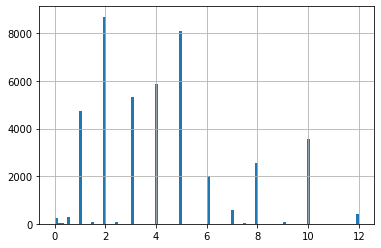

In [16]:
# Analyzing Code Review Hours
df_survey_no_outlier['CodeRevHrs'].hist(bins=100);

In [17]:
# Analyzing Number of people who spent reviewing the code and total number of respondents in that country
df_survey_no_outlier.groupby('Country')['CodeRevHrs', 'Respondent'].count().sort_values(by='CodeRevHrs',ascending=False).head(10)


,CodeRevHrs,Respondent
Country,,
United States,10181,17271
India,4468,8444
Germany,2931,5406
United Kingdom,2799,4751
Canada,1715,3002
France,1161,2204
Poland,1141,1870
Brazil,1064,1848
Netherlands,981,1663


It can be seen that a lot of developers in United States, India, United Kingdom, Germany and Canada spend some of their time reviewing the code. But this data is biased because a larger numbers of developers from the above countries filled the survey. 

In [18]:
# Analyzing Working Hours
df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'WorkWeekHrs':'median'}).sort_values(by='WorkWeekHrs', ascending=False).head(10)

,Respondent,WorkWeekHrs
Country,,
Sierra Leone,1,90.0
Burundi,1,70.0
Turkmenistan,5,57.5
Mali,3,57.5
Seychelles,2,50.0
Oman,11,50.0
Liechtenstein,2,50.0
Botswana,5,50.0
Afghanistan,38,45.0


Respondents in some of the countries such as Burundi, Sierra Leone, Turkmenistan and Mali work higher than the average working hours of 40 hours per week. We could have accepted these numbers if there were a higher number of respondents sharing the same data. However, only a maximum of 5 respondents shared this high working hours, which doesn't represent the whole population. Let's calculate the minimum sample size that is needed to validate the data.  

In [19]:
# Calculating minimum number of respondents needed to have a reasonable deduction
df_survey_no_outlier.groupby('Country')['Respondent'].count().quantile(0.5)

58.0

In [20]:
# Finding countries where developers work more than 40 hours per week and sample size greater than 58
df_res_workhrs_40g = df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'WorkWeekHrs':'median'})
df_res_workhrs_40g[(df_res_workhrs_40g['Respondent']>58) & (df_res_workhrs_40g['WorkWeekHrs']>40)].sort_values(by='WorkWeekHrs', ascending=False).head(10)

,Respondent,WorkWeekHrs
Country,,
China,631,45.00
Israel,909,45.00
Lebanon,114,45.00
El Salvador,63,44.00
Iran,691,44.00
Chile,195,42.25
India,8444,42.00
Nepal,225,42.00
Switzerland,858,41.00


Devlopers in China, Israel, Lebanon and El Salvador work 5 hours more than 40 hours a week. 

In [21]:
# Finding countries where developers work less than 40 hours per week and sample size greater than 58
df_res_workhrs_40l = df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'WorkWeekHrs':'median'})
df_res_workhrs_40l[(df_res_workhrs_40l['Respondent']>59) & (df_res_workhrs_40l['WorkWeekHrs']<40)].sort_values(by='WorkWeekHrs', ascending=False).head(10)

,Respondent,WorkWeekHrs
Country,,
France,2204,39.0
Finland,523,38.0
Denmark,554,37.0


Devlopers in France, Finland and Denmark work less than 40 hours a week. This resonates with a well known work life balance culture in these countries.

# Question 1 - Should I pursue higher education? Which degree – BS, MS..?
For this, we'll use 'EdLevel' variable. 

In [22]:
# Analyzing education level
df_ed = df_survey_no_outlier['EdLevel'].value_counts(normalize=True, ascending=True) #By default, NaN values are dropped
df_ed

I never completed any formal education                                                0.006352
Professional degree (JD, MD, etc.)                                                    0.013208
Primary/elementary school                                                             0.017917
Other doctoral degree (Ph.D, Ed.D., etc.)                                             0.025174
Associate degree                                                                      0.033635
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.107502
Some college/university study without earning a degree                                0.122107
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           0.223490
Bachelor’s degree (BA, BS, B.Eng., etc.)                                              0.450615
Name: EdLevel, dtype: float64

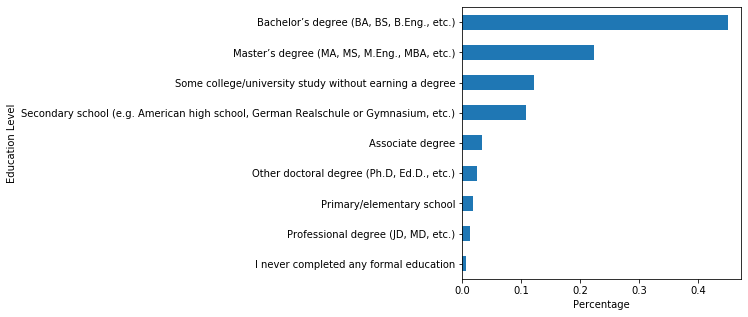

In [23]:
# Plotting a bar graph for education level
ax = df_ed.plot(kind='barh', figsize=(5,5))
ax.set_xlabel("Percentage")
ax.set_ylabel("Education Level");


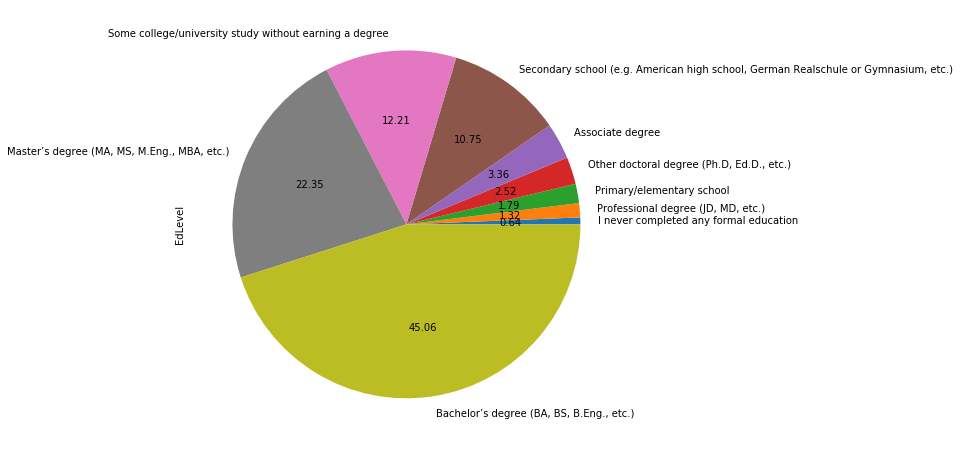

In [24]:
# Plotting a pie chart for education level
df_ed.plot(kind='pie', figsize=(8,8), autopct='%.2f');

We can see from the above graphs that a majority of software developers have some sort of higher education. Around 67% of the respondents have at least a Bachelor's degree. 22.35% of the respondents have a Master's degree, 12.21% dropped out of college and 4% have Professional or doctoral degree. Overall, 71% of the respondents have some sort of higher education.

# Question 2 -  What should I concentrate in? Subjects?
For this, we'll use 'UndergradMajor' variable. 

In [25]:
# Analyzing Undergraduate major
df_um = df_survey_no_outlier['UndergradMajor'].value_counts(normalize=True, ascending=True).rename_axis('Undergrad Major').reset_index(name='Proportion')
df_um

,Undergrad Major,Proportion
0,"A health science (ex. nursing, pharmacy, radio...",0.004278
1,I never declared a major,0.013027
2,Fine arts or performing arts (ex. graphic desi...,0.016112
3,"A social science (ex. anthropology, psychology...",0.017826
4,"A humanities discipline (ex. literature, histo...",0.020121
5,"A business discipline (ex. accounting, finance...",0.024384
6,Mathematics or statistics,0.037306
7,"A natural science (ex. biology, chemistry, phy...",0.041032
8,Web development or web design,0.046353
9,"Information systems, information technology, o...",0.070573


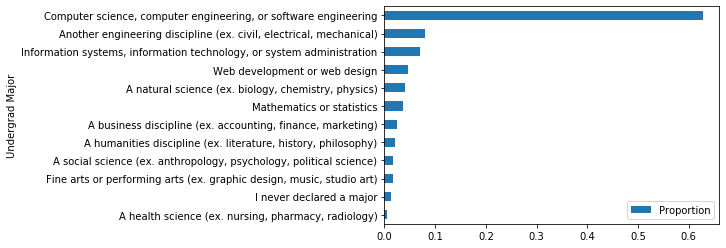

In [26]:
# Plotting a bar graph for Undergraduate major
df_um.plot(kind='barh', x='Undergrad Major', y='Proportion');

We can see from the above graph that around 82.5% of the software engineers have a degree in Computer Science, Engineering (civil, electrical, mechanical), Information Technology, Web development or design.

# Question 3 - What languages, database and platform should I learn?
We'll use 'LanguageWorkedWith', 'DatabaseWorkedWith' and 'PlatformWorkedWith' variables for this question.

In [27]:
# Checking most common languages used 
df_survey_no_outlier['LanguageWorkedWith'].value_counts().head()

HTML/CSS;JavaScript;PHP;SQL              1345
C#;HTML/CSS;JavaScript;SQL               1251
HTML/CSS;JavaScript                      1149
C#;HTML/CSS;JavaScript;SQL;TypeScript     893
Java                                      849
Name: LanguageWorkedWith, dtype: int64

Respondents chose multiple options for languages they use. This doesn't give a true picture of popularity of each language, so we need to extract each language from each row and count it.

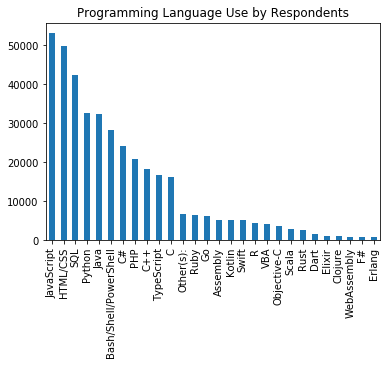

In [28]:
# Plotting languages after splitting the data
df_lg = df_survey_no_outlier.LanguageWorkedWith.str.split(';', expand=True).stack().value_counts()
df_lg.plot(kind='bar')
plt.title('Programming Language Use by Respondents');

We can see that the top 5 languages (>50%) are JavaScript, HTML/CSS, SQL, Python and Java. Now let's see which language is popular in each country.

In [29]:
# Creating a dataframe of languages used per user and country he/she belongs to
df_languages = df_survey_no_outlier.LanguageWorkedWith.str.get_dummies(';')
df_languages_country = pd.concat([df_languages, df_survey_no_outlier['Country']], axis = 1)
df_languages_country.head(5)

,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,Other(s):,PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly,Country
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,United Kingdom
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,Bosnia and Herzegovina
2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Thailand
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,United States
4,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,Ukraine


In [30]:
# Counting language usage per country
df_languages_country_count = df_languages_country.set_index('Country').stack().reset_index().groupby(['Country','level_1']).sum().reset_index().rename(columns={"level_1": "Language", 0: "Count"}).reset_index()
df_languages_country_count.head(5)

,index,Country,Language,Count
0,0,Afghanistan,Assembly,6
1,1,Afghanistan,Bash/Shell/PowerShell,5
2,2,Afghanistan,C,9
3,3,Afghanistan,C#,9
4,4,Afghanistan,C++,9


In [31]:
# Counting number of respondents per country (for sorting later on)
df_languages_country_respondents = df_languages_country.set_index('Country').groupby('Country').count().reset_index()
df_languages_country_respondents.head(5)

,Country,Assembly,Bash/Shell/PowerShell,C,C#,C++,Clojure,Dart,Elixir,Erlang,F#,Go,HTML/CSS,Java,JavaScript,Kotlin,Objective-C,Other(s):,PHP,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA,WebAssembly
0,Afghanistan,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
1,Albania,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
2,Algeria,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125,125
3,Andorra,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
4,Angola,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [32]:
# Merging above two dataframes and sorting by respondent size
df_languages_country_count.merge(df_languages_country_respondents, left_on='Country', right_on='Country')[['Country','Language','Count', 'Assembly']].rename(columns={'Country':'Country','Language':'Language','Count':'Count', 'Assembly':'Respondent'}).sort_values('Count', ascending = False).groupby('Country').head(1).head(10)

,Country,Language,Count,Respondent
4689,United States,JavaScript,12270,17271
1945,India,JavaScript,5289,8444
1637,Germany,JavaScript,3311,5406
4633,United Kingdom,JavaScript,3281,4751
853,Canada,JavaScript,2077,3002
1581,France,JavaScript,1505,2204
657,Brazil,JavaScript,1325,1848
237,Australia,JavaScript,1178,1641
3065,Netherlands,JavaScript,1141,1663
3457,Poland,JavaScript,1123,1870


It seems that JavaScript is very popular as it is the top most used language in each country.

In [33]:
# Retrieving top langauge used per country through id
df_languages_country.groupby(['Country']).sum().idxmax(axis = 1).head()


Country
Afghanistan      HTML/CSS
Albania        JavaScript
Algeria          HTML/CSS
Andorra                 C
Angola           HTML/CSS
dtype: object

In [34]:
# Making a function to count and plot a multistring categorical variable
def count_and_plot(df, col):
    
    """ This function counts and plots the occurences of each item in a column, which is multistring categorical variable

    Parameters:
    df (dataframe): Dataframe that contains the categorical variable columns
    col (str): Column name

    Returns:
    count: Count of occurence of each item in a multistring value

   """
    unique_items = {}
    df = df.dropna(subset=[col])
    for item_set in df[col].apply(lambda row: str(row).split(';')):
        for item in item_set:
            if item not in unique_items.keys():
                unique_items[item] = 1
            else:
                unique_items[item] += 1
                
    unique_items_count = pd.DataFrame.from_dict(unique_items, orient='index')
    unique_items_count.columns = ['Count']
    unique_items_count['Proportion'] = unique_items_count['Count']/np.sum(unique_items_count['Count'])
    unique_items_count.sort_values('Count', ascending=False, inplace=True)
    unique_items_count.plot(kind='bar', y='Proportion')
                
    return unique_items_count
                
            

,Count,Proportion
MySQL,36456,0.197915
PostgreSQL,23040,0.125081
Microsoft SQL Server,21651,0.117541
SQLite,21200,0.115092
MongoDB,17275,0.093784
Redis,12397,0.067302
MariaDB,11155,0.060559
Oracle,10973,0.059571
Elasticsearch,9483,0.051482
Firebase,8758,0.047546


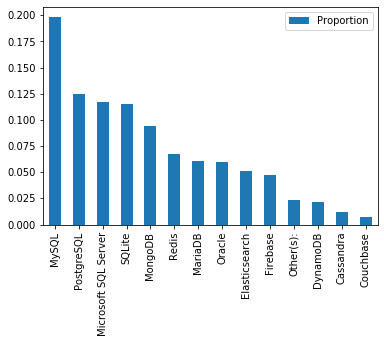

In [35]:
# Counting and Plotting popular Databases
count_and_plot(df_survey_no_outlier, 'DatabaseWorkedWith')

Top 5 databases (>50%) are MySQL, PostgreSQL, Microsoft SQL Server, SQLite and MongoDB

,Count,Proportion
Linux,37957,0.159440
Windows,36300,0.152479
Docker,22389,0.094046
Android,19669,0.082620
AWS,18661,0.078386
MacOS,15463,0.064953
Slack,14906,0.062613
Raspberry Pi,10796,0.045349
WordPress,10442,0.043862
iOS,9223,0.038742


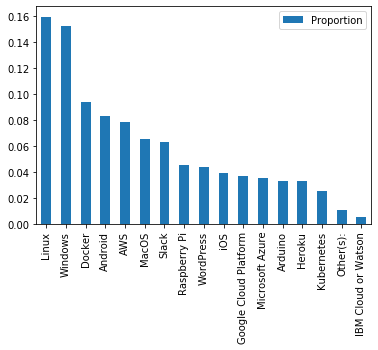

In [36]:
# Counting and Plotting popular paltforms
count_and_plot(df_survey_no_outlier, 'PlatformWorkedWith')

Top 5 platforms (>50%) are Linux, Windows, Docker, Android and AWS

# Question 4 -  How does the job and career satisfaction look like?
We'll take 'JobSat' and "CareerSat' for this question.

In [37]:
# Analayzing the job satisfaction rate
df_js = df_survey_no_outlier['JobSat'].value_counts(normalize=True)  
df_js

Slightly satisfied                    0.344429
Very satisfied                        0.309440
Slightly dissatisfied                 0.153636
Neither satisfied nor dissatisfied    0.124781
Very dissatisfied                     0.067714
Name: JobSat, dtype: float64

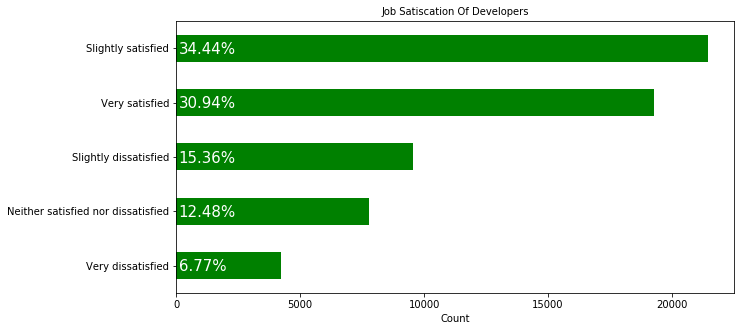

In [38]:
# Plotting the job satisfaction rate
fig = plt.figure(figsize=(10,5))
df_new = df_survey_no_outlier.dropna(subset=['JobSat'])
ax = df_new['JobSat'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'green')
ax.set_title('Job Satiscation Of Developers', fontsize = 10)
ax.set_xlabel('Count')
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
  ax.text(100, i.get_y()+0.15, str(round(i.get_width()/len(df_new)*100,2))+'%',color='white',fontsize=15)
plt.show()

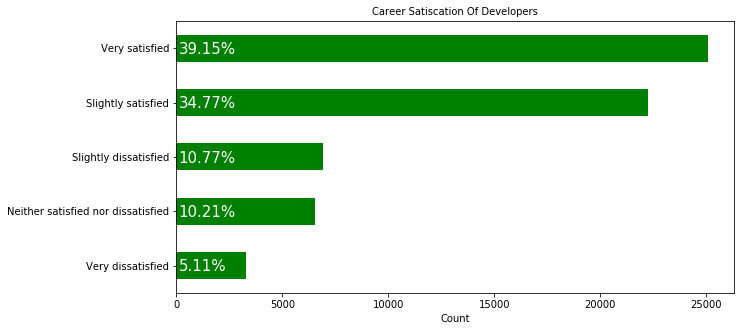

In [39]:
# Plotting the career satisfaction rate
fig = plt.figure(figsize=(10,5))
df_new = df_survey_no_outlier.dropna(subset=['CareerSat'])
ax = df_new['CareerSat'].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = 'green')
ax.set_title('Career Satiscation Of Developers', fontsize = 10)
ax.set_xlabel('Count')
# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
  ax.text(100, i.get_y()+0.15, str(round(i.get_width()/len(df_new)*100,2))+'%',color='white',fontsize=15)
plt.show()

It can be seen that 65% of the respondents are satisfied with their job and around 74% of the people are satisfied with their career.

# Question 5 - How much will I get paid and which countries pay well to developers?

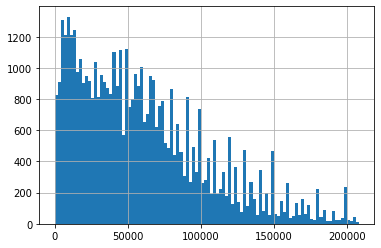

In [40]:
# Analyzing Converted Compensation by plotting a histogram
df_survey_no_outlier['ConvertedComp'].hist(bins=100);

After removing the outliers, the converted compensation lies between 0 to $250,000.

In [41]:
# Finding top 10 paying countries and number of respondents per country
df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'ConvertedComp':'median'}).sort_values(by='ConvertedComp',ascending=False).head(10)

,Respondent,ConvertedComp
Country,,
Andorra,7,160931.0
Democratic Republic of the Congo,6,110484.0
United States,17271,100000.0
Israel,909,89076.0
Switzerland,858,88738.5
Denmark,554,79615.0
Qatar,12,79092.0
Norway,504,75837.0
Australia,1641,72530.0


As can be be seen from the above table, two countries have median salaries greater than that in United States. This is a little strange as United States is known to pay the highest salaries in the world. We have a very low confidence in the salaries in top 2 countries because a very less number of respondents filled the survey. Let's see the countries where the number of respondents is atleast equal to the average number of respondents.

In [42]:
# Finding top 10 paying countries and number of respondents per country after applying minimum number of respondents criteria
df_comp = df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'ConvertedComp':'median'})
df_comp[df_comp['Respondent']>58].sort_values(by='ConvertedComp', ascending=False).head(10)

,Respondent,ConvertedComp
Country,,
United States,17271,100000.0
Israel,909,89076.0
Switzerland,858,88738.5
Denmark,554,79615.0
Norway,504,75837.0
Australia,1641,72530.0
Ireland,394,68745.0
Canada,3002,64888.0
Germany,5406,59579.0


As can be seen from the above table, United States pays the highest with the median salary of $100,000 followed by Israel, Switzerland, Denmark and Norway. These salaries were converted based on the exchange rate, which doesn't take cost of living into account. Let's take top 10 countries by respondent size before we take cost of index into account.


## Applying cost of index

There is a large variation in the salaries in different countries. The reason behind this is that the salary was converted to USD using the exchange rate from currency markets. This is not a right approach as it doesn't take into account living standards (cost of living). To get a better idea, we'll use Purchasing Power Parity (PPP), an approach used by economists to compare different economies. I used World Bank's PPP conversion factor - https://data.worldbank.org/indicator/PA.NUS.PPP for analysis. Adjusted salary is in terms of international dollars, a common currency to compare economies after factoring PPP.

In [43]:
# Taking top 10 countries based on respondent size for gurther analysis
df_sal = df_survey_no_outlier.groupby('Country').agg({'Respondent': 'count', 'ConvertedComp':'median'}).sort_values(by='Respondent', ascending=False).rename(columns={"Respondent": "Total Respondents", "ConvertedComp": "Salary"}).head(10)
df_sal

,Total Respondents,Salary
Country,,
United States,17271,100000.0
India,8444,10080.0
Germany,5406,59579.0
United Kingdom,4751,58881.0
Canada,3002,64888.0
France,2204,45830.0
Poland,1870,32064.0
Brazil,1848,17052.0
Netherlands,1663,53850.0


In [44]:
# Making new columns
df_sal['Conversion Rate'] = pd.Series([1, 71.75 , 0.91 , 0.77 , 1.33, 0.91, 3.91, 4.24, 0.91, 62.84], index=df_sal.index)
df_sal['Local Currency Units'] = (df_sal['Salary'] * df_sal['Conversion Rate']).round(2)
df_sal['PPP Conversion Factor'] = pd.Series([1, 18.15, 0.76, 0.7, 1.24, 0.77, 1.78, 2.03, 0.8, 25.64], index=df_sal.index)
df_sal['Adjusted Salary'] = (df_sal['Local Currency Units']/df_sal['PPP Conversion Factor']).round(2)
df_sal

,Total Respondents,Salary,Conversion Rate,Local Currency Units,PPP Conversion Factor,Adjusted Salary
Country,,,,,,
United States,17271,100000.0,1.00,100000.00,1.00,100000.00
India,8444,10080.0,71.75,723240.00,18.15,39847.93
Germany,5406,59579.0,0.91,54216.89,0.76,71338.01
United Kingdom,4751,58881.0,0.77,45338.37,0.70,64769.10
Canada,3002,64888.0,1.33,86301.04,1.24,69597.61
France,2204,45830.0,0.91,41705.30,0.77,54162.73
Poland,1870,32064.0,3.91,125370.24,1.78,70432.72
Brazil,1848,17052.0,4.24,72300.48,2.03,35616.00
Netherlands,1663,53850.0,0.91,49003.50,0.80,61254.38


In [45]:
# Choosing Salary, Adjusted Salary and Differnce columns
df_sal = df_sal[['Salary', 'Adjusted Salary']]
df_sal['Difference'] = df_sal[ 'Adjusted Salary'] - df_sal['Salary']
df_sal_new = df_sal.sort_values('Adjusted Salary', ascending=False).style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d'])
df_sal_new

,Salary,Adjusted Salary,Difference
Country,,,
United States,100000,100000,0
Germany,59579,71338,11759
Poland,32064,70432.7,38368.7
Canada,64888,69597.6,4709.61
United Kingdom,58881,64769.1,5888.1
Netherlands,53850,61254.4,7404.38
Russian Federation,23280,57056,33776
France,45830,54162.7,8332.73
India,10080,39847.9,29767.9


It can be seen from the above plot that the highest difference in the salaries after adjusting for cost of living is seen for Poland, Russia, India and Brazil. This can be explained by higher conversion rate and lower cost of living. After adjusting the salary, Poland and Russian Federation jumped up a few spots and has comparable salaries with other countries while India and Brazil still witness lower salaries.


# Question 6 - On what factors does salary depend?
To find answers to this question, we'll have to do some data preparation that involves taking care of missing values, converting categorical variables into dummy variables, removing rows that have null values for target variables, binning, etc.
'ConvertedComp' is our target variable (y).

In [136]:
# Importing libraries
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras import optimizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

In [50]:
# Removing rows, which have null values for our taerget variable - ConvertedComp
final_df = df_survey_no_outlier[df_survey_no_outlier['ConvertedComp'].notnull()]

In [52]:
# Counting rows and columns of final dataset 
final_df.shape

(48246, 85)

Based on the domain understanding, I've taken a mix of categorical and continuous variables as our predictor variable (X) - 'EdLevel', 'Country', 'Ethnicity', 'Hobbyist', 'UndergradMajor', 'CareerSat', 'JobSat', 'Gender',       'Sexuality','DevType','OrgSize','Employment','LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith', 'MiscTechWorkedWith','DevEnviron'

## Data Preparation
'YearsCode' and 'YearsCodePro' are string variables and we need to convert them into numerical values in order to run our model. 

In [53]:
# Function to convert string into numerical value
def yearscode_to_int(yearvalue):
    if yearvalue in ['Less than 1 year']:
        return 1
    elif yearvalue == 'More than 50 years':
        return 50
    elif isinstance(yearvalue, str):
        return int(yearvalue)
    else:
        return yearvalue
    
final_df['YearsCode'] = final_df['YearsCode'].apply(lambda x: yearscode_to_int(x))
final_df['YearsCodePro'] = final_df['YearsCodePro'].apply(lambda x: yearscode_to_int(x))

In [55]:
# Choosing categorical and numerical features separately to convert into dummies and treat missing values respectively
categorical_features = ['EdLevel', 'Country', 'Ethnicity', 'Hobbyist', 'UndergradMajor', \
            'CareerSat', 'JobSat', 'Gender', 'Sexuality','DevType','OrgSize','Employment', \
            'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith', \
            'MiscTechWorkedWith','DevEnviron']
numerical_features = ['Age','WorkWeekHrs','YearsCode','YearsCodePro']
total_features = categorical_features + numerical_features
target = 'ConvertedComp'

X = final_df[total_features]
y = final_df[target]

In [56]:
# Converting categorical features into dummy variables
for col in categorical_features:
    print('Categorical {}'.format(col)) # Printing to see where the process breaks 
    tmp_df = X[col].str.get_dummies(sep=';')
    X = pd.concat([X, tmp_df], axis=1)

# Imputing missing values in numerical features with median of the values in that column
for col in numerical_features:
    print('Numerical {}'.format(col))
    X[col] = X[col].fillna(X[col].median())

Categorical EdLevel
Categorical Country
Categorical Ethnicity
Categorical Hobbyist
Categorical UndergradMajor
Categorical CareerSat
Categorical JobSat
Categorical Gender
Categorical Sexuality
Categorical DevType
Categorical OrgSize
Categorical Employment
Categorical LanguageWorkedWith
Categorical DatabaseWorkedWith
Categorical PlatformWorkedWith
Categorical WebFrameWorkedWith
Categorical MiscTechWorkedWith
Categorical DevEnviron
Numerical Age
Numerical WorkWeekHrs
Numerical YearsCode
Numerical YearsCodePro


In [57]:
# Dropping the original categorical variables
X = X.drop(categorical_features, axis = 1)

In [50]:
# Analyzing X - our predictor variables
X.head()

,Age,WorkWeekHrs,YearsCode,YearsCodePro,Associate degree,"Bachelor’s degree (BA, BS, B.Eng., etc.)",I never completed any formal education,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Other doctoral degree (Ph.D, Ed.D., etc.)",Primary/elementary school,"Professional degree (JD, MD, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Afghanistan,Albania,Algeria,Andorra,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Chad,Chile,China,Colombia,"Congo, Republic of the...",Costa Rica,Croatia,Cuba,Cyprus,Czech Republic,Côte d'Ivoire,Democratic People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Estonia,Ethiopia,Fiji,Finland,France,Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Haiti,Honduras,Hong Kong (S.A.R.),Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Libyan Arab Jamahiriya,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Mauritius,Mexico,Monaco,Mongolia,Montenegro,Morocco,Mozambique,Myanmar,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,Norway,Oman,Other Country (Not Listed Above),Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Republic of Korea,Republic of Moldova,Romania,Russian Federation,Rwanda,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Korea,Spain,Sri Lanka,Sudan,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Taiwan,Tajikistan,Thailand,The former Yugoslav Republic of Macedonia,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States,Uruguay,Uzbekistan,"Venezuela, Bolivarian Republic of...",Viet Nam,Yemen,Zambia,Zimbabwe,Biracial,Black or of African descent,East Asian,Hispanic or Latino/Latina,Middle Eastern,Multiracial,"Native American, Pacific Islander, or Indigenous Australian",South Asian,White or of European descent,No,Yes,"A business discipline (ex. accounting, finance, marketing)","A health science (ex. nursing, pharmacy, radiology)","A humanities discipline (ex. literature, history, philosophy)","A natural science (ex. biology, chemistry, physics)","A social science (ex. anthropology, psychology, political science)","Another engineering discipline (ex. civil, electrical, mechanical)","Computer science, computer engineering, or software engineering","Fine arts or performing arts (ex. graphic design, music, studio art)",I never declared a major,"Information systems, information technology, or system administration",Mathematics or statistics,Web development or web design,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied,Man,"Non-binary, genderqueer, or gender non-conforming",Woman,Bisexual,Gay or Lesbian,Straight / Heterosexual,Academic researcher,Data or business analyst,Data scientist or machine learning specialist,Database administrator,Designer,DevOps specialist,"Developer, QA or test","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices","Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile",Educator,"Engineer, data","Engineer, site reliability",Engineering manager,Marketing or sales professional,Product manager,Scientist,Senior executive/VP,Student,System administrator,"1,000 to 4,999 employees",10 to 19 employees,"10,000 or more employees",100 to 499 employees,2-9 employees,20 to 99 

In [58]:
# Analyzing y - our target variable
y.head()

2      8820.0
3     61000.0
8     95179.0
9     13293.0
12    90000.0
Name: ConvertedComp, dtype: float64

In [59]:
# Splitting the dataset into test and train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

## Data Modelling

### Model 1 - Random Forest Regression

In [60]:
# Making object of the Random Forest Regressor and fitting the training data
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [61]:
# Checking feature importance
feature_importances = pd.DataFrame(regressor.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
United States,0.317703
YearsCodePro,0.089471
YearsCode,0.081156
WorkWeekHrs,0.024821
Age,0.022695
...,...
Lesotho,0.000000
Andorra,0.000000
Haiti,0.000000
Democratic People's Republic of Korea,0.000000


In [62]:
# Predicting y values for test data
y_pred = regressor.predict(X_test)

In [63]:
# Checking explained variance (r^2)
explained_variance_score(y_test, y_pred)

0.6706187663069753

In [65]:
# Checking Mean Square Error
mean_squared_error(y_test, y_pred)

661006228.1950614

In [66]:
# Using Cross validation with 3 folds
scores = cross_val_score(regressor, X, y, cv=3)
scores

array([0.67760137, 0.65933004, 0.66792584])

It can be seen from the above results that our model was able to explain 67% of the variance and the best possible score is 100%. This model doesn't look great but we have very less data in order to make good predictions. We also have a lot of categorical variables, which were converted into numerical variables. We ended up with 357 rows, which are way too much as it induces the curse of dimensionality. We might want to control the number of features that we'll do in classification.

### Model 2 - Gradient Boosting Regression

In [67]:
# Making object of Gradient Boosting Regression Class
gbr = GradientBoostingRegressor(loss='ls',
                                n_estimators=100, max_depth=10,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [68]:
# Fitting the training data
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=9, min_samples_split=9,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
# Checking feature importance
feature_importances = pd.DataFrame(gbr.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
United States,0.375573
YearsCodePro,0.119718
YearsCode,0.065103
Age,0.025661
White or of European descent,0.025581
...,...
Malawi,0.000000
Maldives,0.000000
Mali,0.000000
Malta,0.000000


In [72]:
# Predicting y values for test data
y_pred_gbr = gbr.predict(X_test)

In [73]:
# Checking explained variance (r^2)
explained_variance_score(y_test, y_pred_gbr)

0.695648588669415

In [74]:
# Checking mean square error
mean_squared_error(y_test, y_pred_gbr)

610783611.0537343

We can see from the above results that GBM works better than Random Forest in this case as MSE is lower and Explained variance is higher for GBM as compared to Random Forest.

### Model 3 - Aritificial Neural Network (ANN)

In [76]:
# Normalizing numerical variables
def norm(row, col):
  return (row - X[col].mean()) / X[col].std()

for col in numerical_features:
    X_train[col] = X_train[col].apply(lambda row: norm(row, col))
    X_test[col] = X_test[col].apply(lambda row: norm(row, col))
    

In [77]:
# Building a model with two densely connected hidden layers, and an output layer that returns a single, continuous value.
def build_model():
  model = Sequential([
    Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    Dense(128, activation='relu'),
    Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [78]:
model = build_model()

In [79]:
# Inspecing the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               45824     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 62,465
Trainable params: 62,465
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Training the model by fitting training data
history = model.fit(
  X_train, y_train,
  epochs=50, validation_split = 0.2, verbose=1)

Train on 28947 samples, validate on 7237 samples
Epoch 1/50
28947/28947 [==============================] - 3s 103us/step - loss: 3183006037.9347 - mae: 42752.9062 - mse: 3183003648.0000 - val_loss: 1909304593.0148 - val_mae: 34617.8438 - val_mse: 1909304448.0000
Epoch 2/50
28947/28947 [==============================] - 3s 109us/step - loss: 1645725097.9813 - mae: 31913.1543 - mse: 1645724928.0000 - val_loss: 1453680936.6710 - val_mae: 29660.9824 - val_mse: 1453681408.0000
Epoch 3/50
28947/28947 [==============================] - 3s 97us/step - loss: 1229448916.3981 - mae: 26803.2812 - mse: 1229448832.0000 - val_loss: 1099531959.9038 - val_mae: 24825.6855 - val_mse: 1099531648.0000
Epoch 4/50
28947/28947 [==============================] - 3s 98us/step - loss: 1001119948.0021 - mae: 23366.3008 - mse: 1001120000.0000 - val_loss: 937161581.2298 - val_mae: 22301.8418 - val_mse: 937161664.0000
Epoch 5/50
28947/28947 [==============================] - 3s 100us/step - loss: 878359850.0520 - ma

Epoch 40/50
28947/28947 [==============================] - 3s 100us/step - loss: 598047979.8329 - mae: 16198.3252 - mse: 598048448.0000 - val_loss: 634586148.5212 - val_mae: 16648.1484 - val_mse: 634586240.0000
Epoch 41/50
28947/28947 [==============================] - 3s 100us/step - loss: 597128938.1040 - mae: 16176.7656 - mse: 597129216.0000 - val_loss: 633841103.6706 - val_mae: 16551.0996 - val_mse: 633841088.0000
Epoch 42/50
28947/28947 [==============================] - 3s 101us/step - loss: 595739891.8929 - mae: 16143.3916 - mse: 595740032.0000 - val_loss: 639762351.5910 - val_mae: 16554.2383 - val_mse: 639762240.0000
Epoch 43/50
28947/28947 [==============================] - 3s 114us/step - loss: 594778649.5717 - mae: 16127.7412 - mse: 594778368.0000 - val_loss: 637385287.9149 - val_mae: 16534.7695 - val_mse: 637385280.0000
Epoch 44/50
28947/28947 [==============================] - 3s 103us/step - loss: 594368157.4541 - mae: 16133.8486 - mse: 594367872.0000 - val_loss: 63350371

In [81]:
# Visualizing the stats
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,loss,mae,mse,epoch
45,6.482185e+08,16553.345703,648218304.0,5.923825e+08,16092.841797,592382400.0,45
46,6.343133e+08,16605.865234,634313216.0,5.913698e+08,16070.401367,591369856.0,46
47,6.353580e+08,16559.761719,635358016.0,5.905362e+08,16049.311523,590535872.0,47
48,6.331046e+08,16656.427734,633104576.0,5.893427e+08,16033.073242,589342720.0,48
49,6.330232e+08,16665.564453,633023296.0,5.885608e+08,16031.130859,588560832.0,49


In [82]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0.5, 0, 'Epochs')

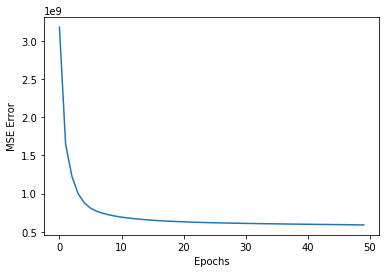

In [84]:
# Plotting MSE vs Epochs
plt.plot('epoch', 'mse', data = hist)
plt.ylabel('MSE Error')
plt.xlabel('Epochs')

In [99]:
# Precting y values
y_pred_ann =  model.predict(X_test).flatten()

In [100]:
# Checking explained variance (r^2)
explained_variance_score(y_test, y_pred_ann)

0.686220492179459

In [101]:
# Checking mean square error
mean_squared_error(y_test, y_pred_ann)

629700382.7726878

Text(0, 0.5, 'Predictions')

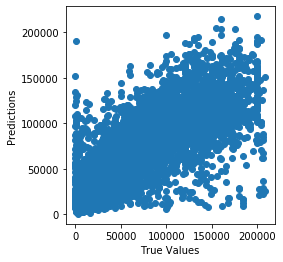

In [105]:
# Plotting true values vs predictions
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_ann)
plt.xlabel('True Values')
plt.ylabel('Predictions')


It looks like the model wasn't able to properly predict the values and that can be seen from the lower explained variance and a higher MSE as compared to GBM.

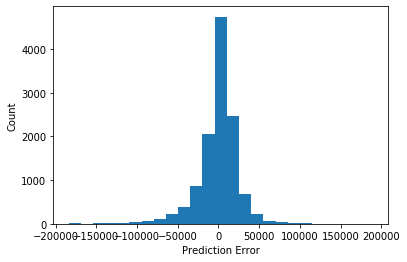

In [107]:
# Plotting the distribution of erro
error = y_pred_ann - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

The distribution doesn't look like gaussian, but we might expect that because the number of samples is very small.

### Model Evaluation
From the analysis above we can compare different models by comparing their mean square error. In this case, GBM works the best followed by ANN and Random Forest.

We can confirm that Salary is highly dependent on on the country, Years you have been coding, Age, hours per week spent, Organization Size, Ethnicity and Job Satisfaction. 

# Question 7 - On what factors does job satisfaction depend?
We'll take 'JobSat' as target variable in this case. This is a classification problem as we are to predict the level/class of job satsifcation. We could have just went ahead with creating dummy variables and imputing missing values but as discussed earlier, we want to reduce the nuber of columns (feature variables). So, let's try to do that.

### Data Preparation

In [139]:
# Function to make bins for differnt age groups (binning)
def age_bin(age):
    if age < 20:
        return 'Very Young'
    elif age >= 20 and age < 30:
        return 'Young'
    elif age >= 30 and age < 40:
        return 'Middle Age'
    elif age > 40 and age <= 50:
        return 'Senior'
    else:
        return 'Old'

In [140]:
# Allocating countries to continent - will reduce 170 columns (countries) into 9 columns (continents)
countries_to_continent_str = "côte d'ivoire-africa;United Kingdom-Europe;Bosnia and Herzegovina-Europe;Thailand-Asia;United States-North America;Ukraine-Europe;Canada-North America;India-Asia;New Zealand-Oceania;Antigua and Barbuda-North America;Germany-Europe;Australia-Oceania;Russian Federation-Europe;Brazil-South America;Lithuania-Europe;Israel-Asia;South Africa-Africa;Colombia-South America;Turkey-Asia;Switzerland-Europe;Argentina-South America;Sri Lanka-Asia;Czech Republic-Europe;Denmark-Europe;Malaysia-Asia;Bangladesh-Asia;Spain-Europe;Serbia-Europe;Poland-Europe;Sweden-Europe;China-Asia;France-Europe;Netherlands-Europe;Italy-Europe;Philippines-Asia;Ireland-Europe;Pakistan-Asia;Azerbaijan-Asia;Austria-Europe;Estonia-Europe;Croatia-Europe;South Korea-Asia;Greece-Europe;Japan-Asia;Romania-Europe;Finland-Europe;Bulgaria-Europe;Viet Nam-Asia;Slovenia-Europe;Iran-Asia;Belarus-Europe;Hungary-Europe;Latvia-Europe;Hong Kong (S.A.R.)-Asia;United Arab Emirates-Asia;Portugal-Europe;Nigeria-Africa;Norway-Europe;Nicaragua-North America;Zimbabwe-Africa;Egypt-Africa;Mexico-North America;Dominican Republic-North America;Guatemala-North America;Chile-South America;Ecuador-South America;Ghana-Africa;Uganda-Africa;Cambodia-Asia;Mauritius-Africa;Nepal-Asia;Singapore-Asia;Sierra Leone-Africa;Republic of Moldova-Europe;Belgium-Europe;Armenia-Asia;Afghanistan-Asia;Bahrain-Asia;Mongolia-Asia;Georgia-Asia;Cyprus-Asia;Kenya-Africa;Luxembourg-Europe;Saudi Arabia-Asia;Cape Verde-Africa;Peru-South America;Burundi-Africa;Iraq-Asia;Slovakia-Europe;Algeria-Africa;Taiwan-Asia;Yemen-Asia;Indonesia-Asia;Morocco-Africa;Libyan Arab Jamahiriya-Africa;Belize-North America;Mali-Africa;Trinidad and Tobago-North America;Venezuela, Bolivarian Republic of...-South America;Panama-North America;Lebanon-Asia;Tunisia-Africa;Kuwait-Asia;Andorra-Europe;C√¥te d'Ivoire-Africa;Syrian Arab Republic-Asia;El Salvador-North America;Cameroon-Africa;Malta-Europe;Turkmenistan-Asia;Brunei Darussalam-Asia;Other Country (Not Listed Above)-Asia;Costa Rica-North America;Jordan-Asia;Albania-Europe;Uzbekistan-Asia;Sudan-Africa;Kazakhstan-Asia;The former Yugoslav Republic of Macedonia-Europe;Ethiopia-Africa;Paraguay-South America;Myanmar-Asia;Somalia-Africa;Guyana-South America;Honduras-North America;Qatar-Asia;Jamaica-North America;Fiji-Oceania;Haiti-North America;Democratic Republic of the Congo-Africa;Benin-Africa;Namibia-Africa;Montenegro-Europe;Rwanda-Africa;Tajikistan-Asia;Uruguay-South America;Mauritania-Africa;Bolivia-Europe;Gabon-Africa;Liechtenstein-Europe;United Republic of Tanzania-Africa;Kyrgyzstan-Asia;Lao People's Democratic Republic-Asia;Madagascar-Africa;Guinea-Africa;Republic of Korea-Asia;Cuba-North America;Maldives-Asia;Monaco-Europe;North Korea-Asia;Senegal-Africa;Angola-Africa;Iceland-Europe;Togo-Africa;Swaziland-Africa;Congo, Republic of the...-Africa;Zambia-Africa;Oman-Asia;Timor-Leste-Asia;Tonga-Oceania;Djibouti-Africa;Democratic People's Republic of Korea-Asia;Niger-Africa;Mozambique-Africa;Botswana-Africa;Dominica-North America;Papua New Guinea-Oceania;Barbados-North America;Seychelles-Africa;Lesotho-Africa;Bahamas-North America;Burkina Faso-Africa;Saint Kitts and Nevis-North America;Malawi-Africa;Liberia-Africa;Bhutan-Asia;Saint Vincent and the Grenadines-North America;San Marino-Europe;Sao Tome and Principe-Africa;Chad-Africa"
countries_to_continent_mapping = {}
for item in countries_to_continent_str.split(';'):
    country_to_continent = item.split('-')
    countries_to_continent_mapping[country_to_continent[0].lower()] = country_to_continent[1].lower()

In [141]:
# Choosing X and y variable
categorical_features = ['EdLevel', 'Ethnicity', 'Hobbyist', 'UndergradMajor', \
            'CareerSat','Gender', 'Sexuality','DevType','OrgSize','Employment', \
            'LanguageWorkedWith','DatabaseWorkedWith','PlatformWorkedWith','WebFrameWorkedWith', \
            'MiscTechWorkedWith','DevEnviron','OpenSourcer','Age_Cat','Country_Cat']
numerical_features = ['WorkWeekHrs','YearsCode','YearsCodePro','ConvertedComp']
total_features = categorical_features + numerical_features
target = 'JobSat'

# Making a final dataframe for classification
final_df_c = final_df[final_df['JobSat'].notnull()]
final_df_c['Age_Cat'] = final_df_c['Age'].apply(lambda x: age_bin(x))
final_df_c['Country_Cat'] = final_df_c['Country'].apply(lambda x: countries_to_continent_mapping[x.lower()])
X = final_df_c[total_features]
y = final_df_c[target]

In [142]:
X.head()

,EdLevel,Ethnicity,Hobbyist,UndergradMajor,CareerSat,Gender,Sexuality,DevType,OrgSize,Employment,LanguageWorkedWith,DatabaseWorkedWith,PlatformWorkedWith,WebFrameWorkedWith,MiscTechWorkedWith,DevEnviron,OpenSourcer,Age_Cat,Country_Cat,WorkWeekHrs,YearsCode,YearsCodePro,ConvertedComp
2,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Yes,Web development or web design,Slightly satisfied,Man,Straight / Heterosexual,"Designer;Developer, back-end;Developer, front-...",100 to 499 employees,Employed full-time,HTML/CSS,PostgreSQL,NaN,NaN,NaN,Vim;Visual Studio Code,Never,Young,asia,40.0,3.0,1.0,8820.0
3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,No,"Computer science, computer engineering, or sof...",Very satisfied,Man,Straight / Heterosexual,"Developer, full-stack",100 to 499 employees,Employed full-time,C;C++;C#;Python;SQL,MySQL;SQLite,Linux;Windows,NaN,.NET,Eclipse;Vim;Visual Studio;Visual Studio Code,Never,Young,north america,80.0,3.0,1.0,61000.0
8,Some college/university study without earning ...,White or of European descent,Yes,"Computer science, computer engineering, or sof...",Slightly satisfied,Man,Bisexual,"Database administrator;Developer, back-end;Dev...",10 to 19 employees,Employed full-time,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,DynamoDB;PostgreSQL;SQLite,AWS;Docker;Heroku;Linux;MacOS;Slack,Express;Ruby on Rails;Other(s):,Node.js;Unity 3D,Vim,Once a month or more often,Young,oceania,32.0,12.0,4.0,95179.0
9,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,Yes,NaN,Slightly dissatisfied,NaN,NaN,Data or business analyst;Data scientist or mac...,"10,000 or more employees",Employed full-time,C#;Go;JavaScript;Python;R;SQL,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Linux;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Once a month or more often,Old,asia,70.0,12.0,10.0,13293.0
12,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,Yes,"Computer science, computer engineering, or sof...",Very satisfied,Man,Straight / Heterosexual,Data or business analyst;Database administrato...,10 to 19 employees,Employed full-time,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Couchbase;DynamoDB;Firebase;MySQL,Android;AWS;Docker;IBM Cloud or Watson;iOS;Lin...,Angular/Angular.js;ASP.NET;Express;jQuery;Vue.js,Node.js;Xamarin,Vim;Visual Studio;Visual Studio Code;Xcode,Less than once a month but more than once per ...,Young,north america,40.0,17.0,8.0,90000.0


In [143]:
# Converting categorical variables into dummy variables
for col in categorical_features:
    print('Categorical {}'.format(col))
    tmp_df = X[col].str.get_dummies(sep=';')
    X = pd.concat([X, tmp_df], axis=1)
    
# Imputing missing values with median values
for col in numerical_features:
    print('Numerical {}'.format(col))
    X[col] = X[col].fillna(X[col].median())

Categorical EdLevel
Categorical Ethnicity
Categorical Hobbyist
Categorical UndergradMajor
Categorical CareerSat
Categorical Gender
Categorical Sexuality
Categorical DevType
Categorical OrgSize
Categorical Employment
Categorical LanguageWorkedWith
Categorical DatabaseWorkedWith
Categorical PlatformWorkedWith
Categorical WebFrameWorkedWith
Categorical MiscTechWorkedWith
Categorical DevEnviron
Categorical OpenSourcer
Categorical Age_Cat
Categorical Country_Cat
Numerical WorkWeekHrs
Numerical YearsCode
Numerical YearsCodePro
Numerical ConvertedComp


In [144]:
# Dropping original categorical features
X = X.drop(categorical_features, axis = 1)

In [145]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=42)

### Model 1- Random Forest Classifier

In [146]:
# Making Random Forest object and fitting the training data
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=2, random_state=0)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [161]:
# Analyzing feature importance
feature_importances = pd.DataFrame(rf_classifier.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Very satisfied,0.102212
Slightly satisfied,0.057900
Slightly dissatisfied,0.047952
ConvertedComp,0.036975
Neither satisfied nor dissatisfied,0.025902
Very dissatisfied,0.025864
YearsCode,0.025242
YearsCodePro,0.022657
WorkWeekHrs,0.021089
"Developer, back-end",0.006156


Note: Satisifcation values seen above are the values corresponding to Career Satisfaction. It is fair enough to see both 'CarrerSat' and 'JobSat' as correlated to each other.

In [117]:
# Predicting y values
y_pred = rf_classifier.predict(X_test)

In [118]:
# Calculating F1 score for each class
f1_score(y_test, y_pred, average=None)

array([0.26086957, 0.4372952 , 0.55224392, 0.43718228, 0.68463862])

In [119]:
# Calculating the mean F1 score
f1_score(y_test, y_pred, average='weighted')

0.5345351369448503

In [120]:
# Plotting Confusion matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied,All
True,,,,,,
Neither satisfied nor dissatisfied,261,233,661,44,182,1381
Slightly dissatisfied,170,734,645,101,235,1885
Slightly satisfied,119,195,2418,65,1376,4173
Very dissatisfied,47,257,138,301,84,827
Very satisfied,23,53,722,39,2946,3783
All,620,1472,4584,550,4823,12049


It can be seen that Random Forest gives the f1 score of 53.45%, which is fair enough for a multi-class target variable.

### Model 2 - Gradient Boosting Classifier

In [121]:
# Making a GBM object and fitting the training data
gbc_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_depth=3)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [122]:
# Predicting y values
y_pred = gbc_clf.predict(X_test)

In [123]:
# Calcualting F1 score for all classes
f1_score(y_test, y_pred, average=None)

array([0.31971893, 0.42711235, 0.55267499, 0.44318182, 0.68928243])

In [124]:
# Calculating mean F1 score
f1_score(y_test, y_pred, average='weighted')

0.5417062129686706

In [125]:
# Plotting Confusion matrix
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Neither satisfied nor dissatisfied,Slightly dissatisfied,Slightly satisfied,Very dissatisfied,Very satisfied,All
True,,,,,,
Neither satisfied nor dissatisfied,364,193,592,47,185,1381
Slightly dissatisfied,253,690,590,113,239,1885
Slightly satisfied,184,174,2345,65,1405,4173
Very dissatisfied,58,244,126,312,87,827
Very satisfied,37,45,660,44,2997,3783
All,896,1346,4313,581,4913,12049


F1 score of GBM is beter than that of Random Forest.

### Model 3 - ANN

In [126]:
def norm(row, col):
  return (row - X[col].mean()) / X[col].std()
for col in numerical_features:
    X_train[col] = X_train[col].apply(lambda row: norm(row, col))
    X_test[col] = X_test[col].apply(lambda row: norm(row, col))

In [127]:
# Encoding y train as it is a categorical variable
encoder = LabelBinarizer()
Y_train = encoder.fit_transform(y_train)

In [128]:
# Checking y train
Y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1]])

In [129]:
# Builing the model
model = Sequential([
    Dense(64, activation='relu', input_shape=[len(X_train.keys())]),
    Dense(5, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [130]:
# Checking stats
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                13568     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 13,893
Trainable params: 13,893
Non-trainable params: 0
_________________________________________________________________


In [131]:
# Fitting the model
model.fit(
  X_train, Y_train,
  epochs=50, validation_split = 0.2, verbose=1)

Train on 28916 samples, validate on 7229 samples
Epoch 1/50
28916/28916 [==============================] - 2s 61us/step - loss: 1.2408 - acc: 0.5140 - val_loss: 1.1688 - val_acc: 0.5536
Epoch 2/50
28916/28916 [==============================] - 2s 63us/step - loss: 1.1647 - acc: 0.5514 - val_loss: 1.1651 - val_acc: 0.5565
Epoch 3/50
28916/28916 [==============================] - 2s 74us/step - loss: 1.1513 - acc: 0.5552 - val_loss: 1.1673 - val_acc: 0.5517
Epoch 4/50
28916/28916 [==============================] - 2s 66us/step - loss: 1.1400 - acc: 0.5582 - val_loss: 1.1748 - val_acc: 0.5558
Epoch 5/50
28916/28916 [==============================] - 2s 69us/step - loss: 1.1273 - acc: 0.5614 - val_loss: 1.1773 - val_acc: 0.5536
Epoch 6/50
28916/28916 [==============================] - 2s 73us/step - loss: 1.1141 - acc: 0.5660 - val_loss: 1.1851 - val_acc: 0.5461
Epoch 7/50
28916/28916 [==============================] - 2s 55us/step - loss: 1.1005 - acc: 0.5695 - val_loss: 1.1927 - val_acc:

In [132]:
# Precting y values
y_pred_ann =  model.predict(X_test)

In [137]:
print(classification_report(y_test, y_pred))

                                    precision    recall  f1-score   support

Neither satisfied nor dissatisfied       0.41      0.26      0.32      1381
             Slightly dissatisfied       0.51      0.37      0.43      1885
                Slightly satisfied       0.54      0.56      0.55      4173
                 Very dissatisfied       0.54      0.38      0.44       827
                    Very satisfied       0.61      0.79      0.69      3783

                          accuracy                           0.56     12049
                         macro avg       0.52      0.47      0.49     12049
                      weighted avg       0.54      0.56      0.54     12049



We can see that the average F1 score for ANN is 54%, which si pretty much the same as that of GBM.

### Model Evaluation
In this case also GBM wins as compared to Random Forest and ANN. We can confirm that Job Satisfaction is highly dependent on on the career satisfaction, salary, years in coding, work hours and technology.

## Further Work
1) Instead of imputing missing values in the numerical variables with the median values, I could have imputed them by running another regression model. It might lead to better prediciton for target variable as median might not explain the true picture. <br>

2) We can use variable reduction technique such as removing highly correlated features, Principal Component Analysis (PCA) that extracts new variables to explain maximum variance in the dataset, t- Distributed Stochastic Neighbor Embedding (t-SNE) to detect patterns in a non-linear way, etc. <br>

3) We could get more data of users to make better predictions and we could use adjusted salary instead of converted compensation to account for cost of living.